In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table

import warnings

In [2]:
warnings.simplefilter('ignore')

In [4]:
# original files are found here https://data.desi.lbl.gov/public/edr/vac/edr/lss/v2.0/LSScats/clustering/
lss_data_N = Table.read("data/QSO_N_clustering.dat.fits")
lss_data_S = Table.read("data/QSO_S_clustering.dat.fits")

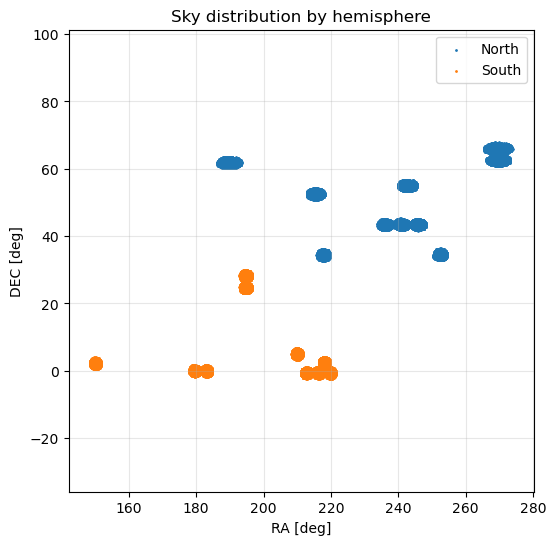

In [5]:
plt.figure(figsize=(6, 6))
plt.scatter(lss_data_N['RA'], lss_data_N['DEC'], s=1, label='North')
plt.scatter(lss_data_S['RA'], lss_data_S['DEC'], s=1, label='South')
plt.xlabel('RA [deg]')
plt.ylabel('DEC [deg]')
plt.title('Sky distribution by hemisphere')
plt.axis('equal')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

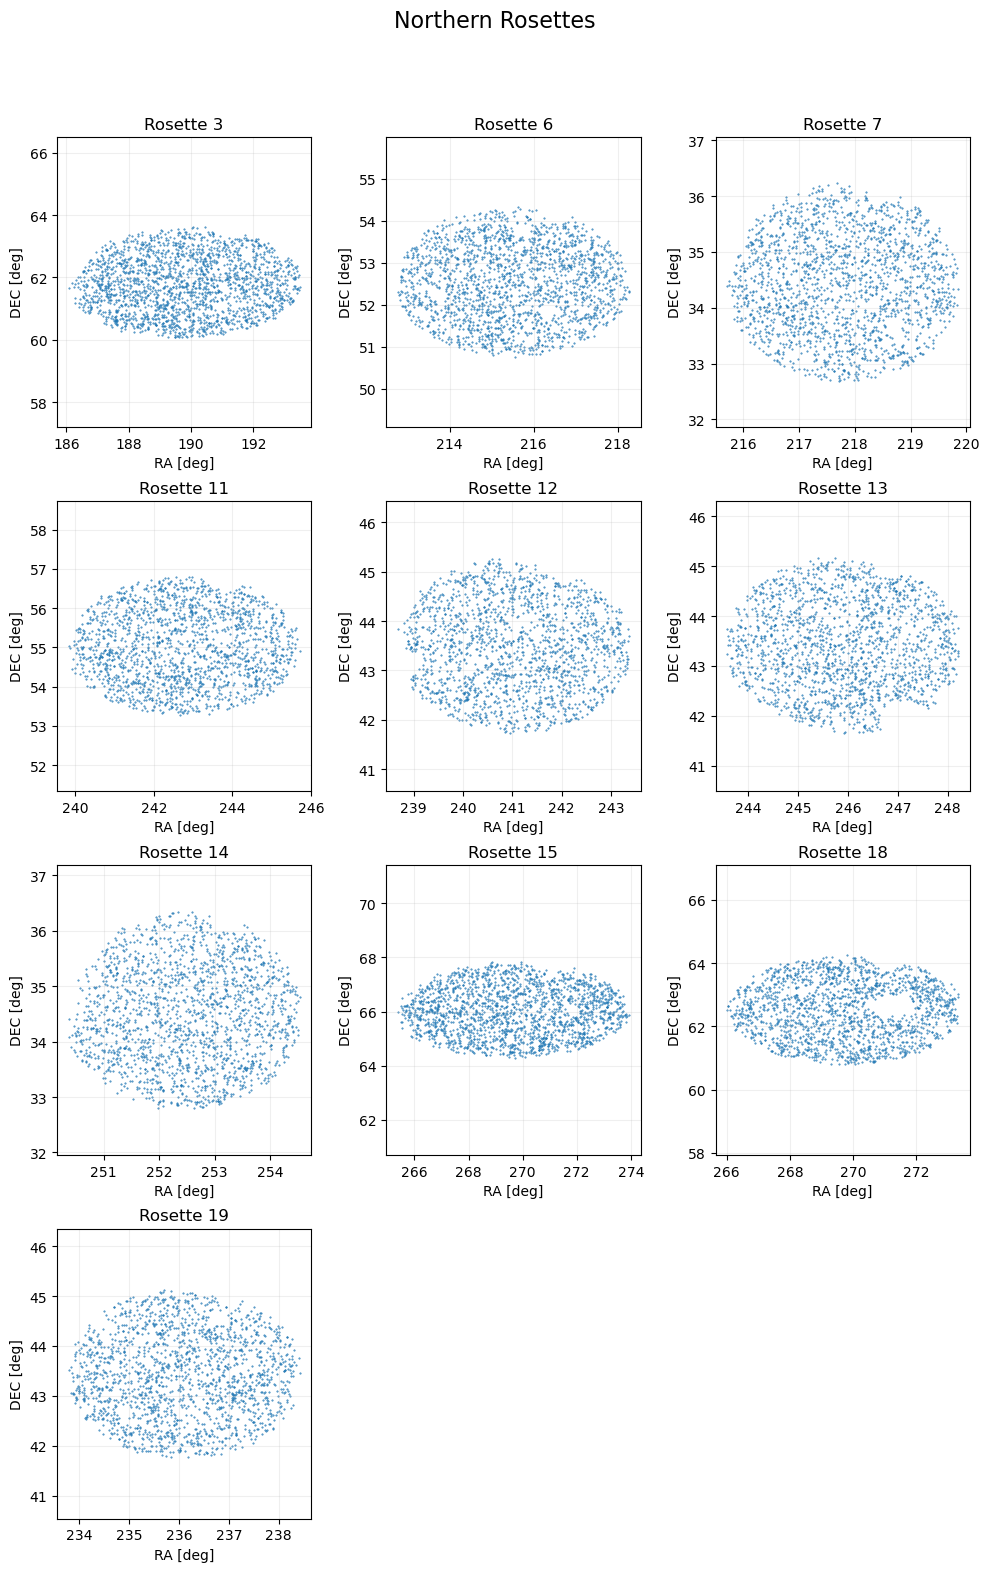

In [6]:
rosettes_N = sorted(set(lss_data_N['ROSETTE_NUMBER']))

fig, axes = plt.subplots(4, 3, figsize=(10, 16))

for i, ros in enumerate(rosettes_N):
    ax = axes.flat[i]
    mask = lss_data_N['ROSETTE_NUMBER'] == ros
    ax.scatter(lss_data_N['RA'][mask], lss_data_N['DEC'][mask], s=0.2)
    ax.set_title(f'Rosette {ros}')
    ax.axis('equal')
    ax.grid(True, alpha=0.2)
    ax.set_xlabel("RA [deg]")
    ax.set_ylabel("DEC [deg]")

# Delete subplots that are empty
for j in range(i+1, len(axes.flat)):
    fig.delaxes(axes.flat[j])

fig.suptitle('Northern Rosettes', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.show()


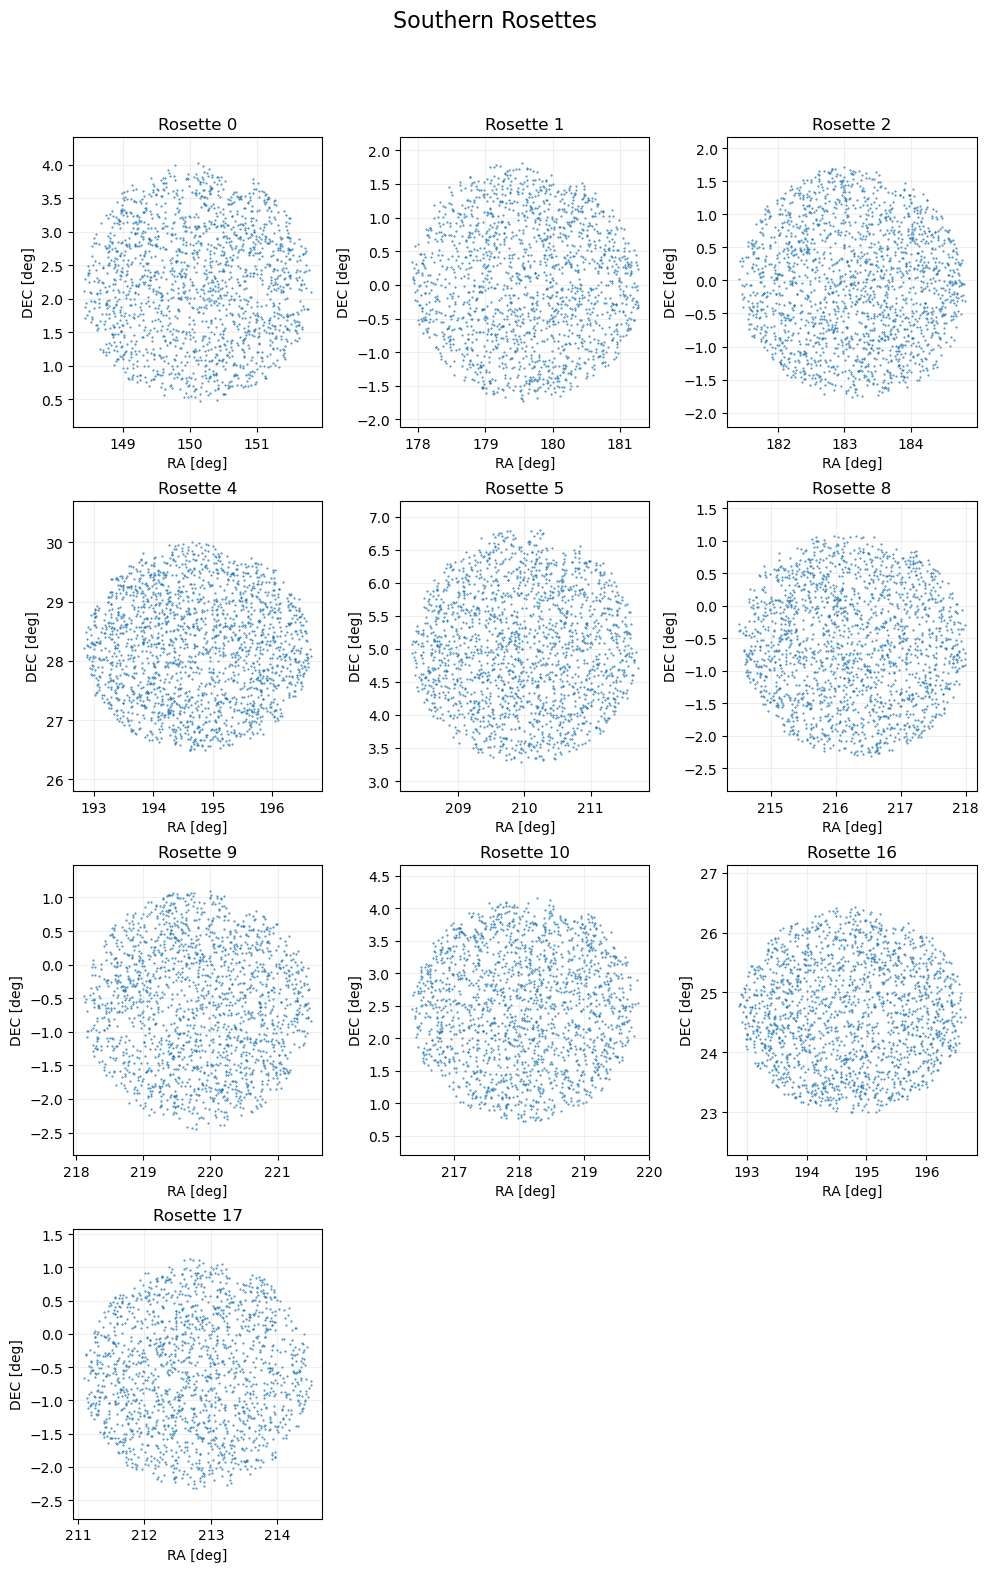

In [7]:
rosettes_S = sorted(set(lss_data_S['ROSETTE_NUMBER']))

fig, axes = plt.subplots(4, 3, figsize=(10, 16))

for i, ros in enumerate(rosettes_S):
    ax = axes.flat[i]
    mask = lss_data_S['ROSETTE_NUMBER'] == ros
    ax.scatter(lss_data_S['RA'][mask], lss_data_S['DEC'][mask], s=0.2)
    ax.set_title(f'Rosette {ros}')
    ax.axis('equal')
    ax.grid(True, alpha=0.2)
    ax.set_xlabel("RA [deg]")
    ax.set_ylabel("DEC [deg]")

for j in range(i+1, len(axes.flat)):
    fig.delaxes(axes.flat[j])

fig.suptitle('Southern Rosettes', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.show()

# Redshift histograms

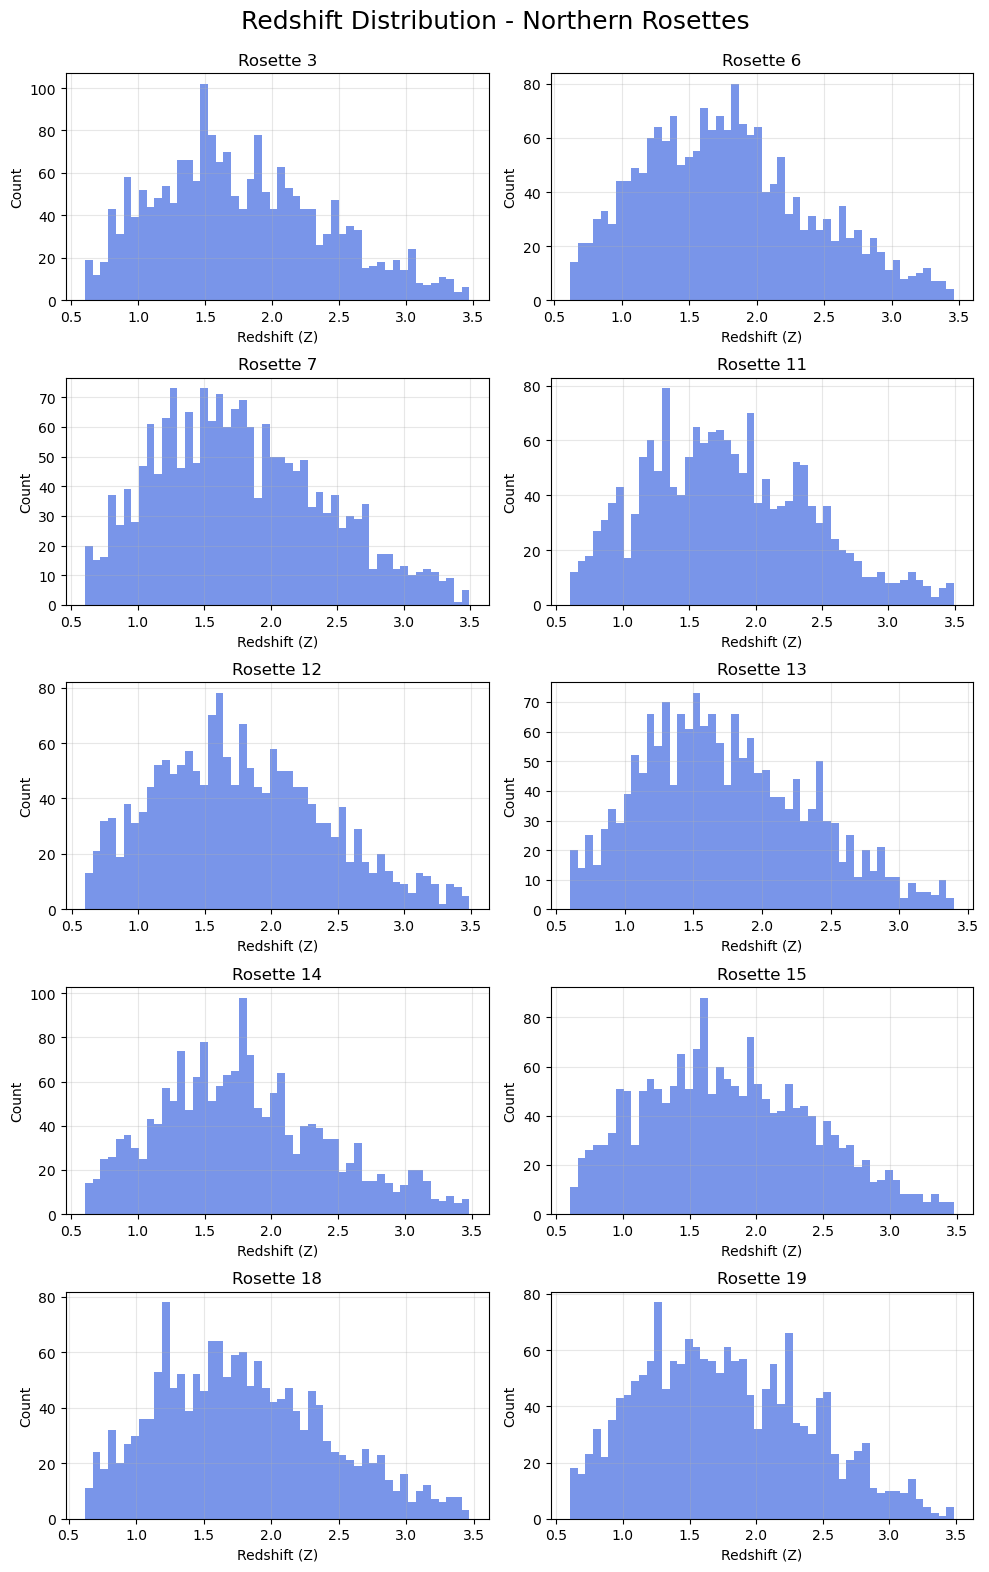

In [8]:
fig, axes = plt.subplots(5, 2, figsize=(10, 16))

for i, ros in enumerate(rosettes_N):
    ax = axes.flat[i]
    mask = lss_data_N['ROSETTE_NUMBER'] == ros
    ax.hist(lss_data_N['Z'][mask], bins=50, color='royalblue', alpha=0.7)
    ax.set_title(f'Rosette {ros}')
    ax.set_xlabel("Redshift (Z)")
    ax.set_ylabel("Count")
    ax.grid(True, alpha=0.3)

for j in range(i+1, len(axes.flat)):
    fig.delaxes(axes.flat[j])

fig.suptitle('Redshift Distribution - Northern Rosettes', fontsize=18)
plt.tight_layout()
plt.subplots_adjust(top=0.94)
plt.show()

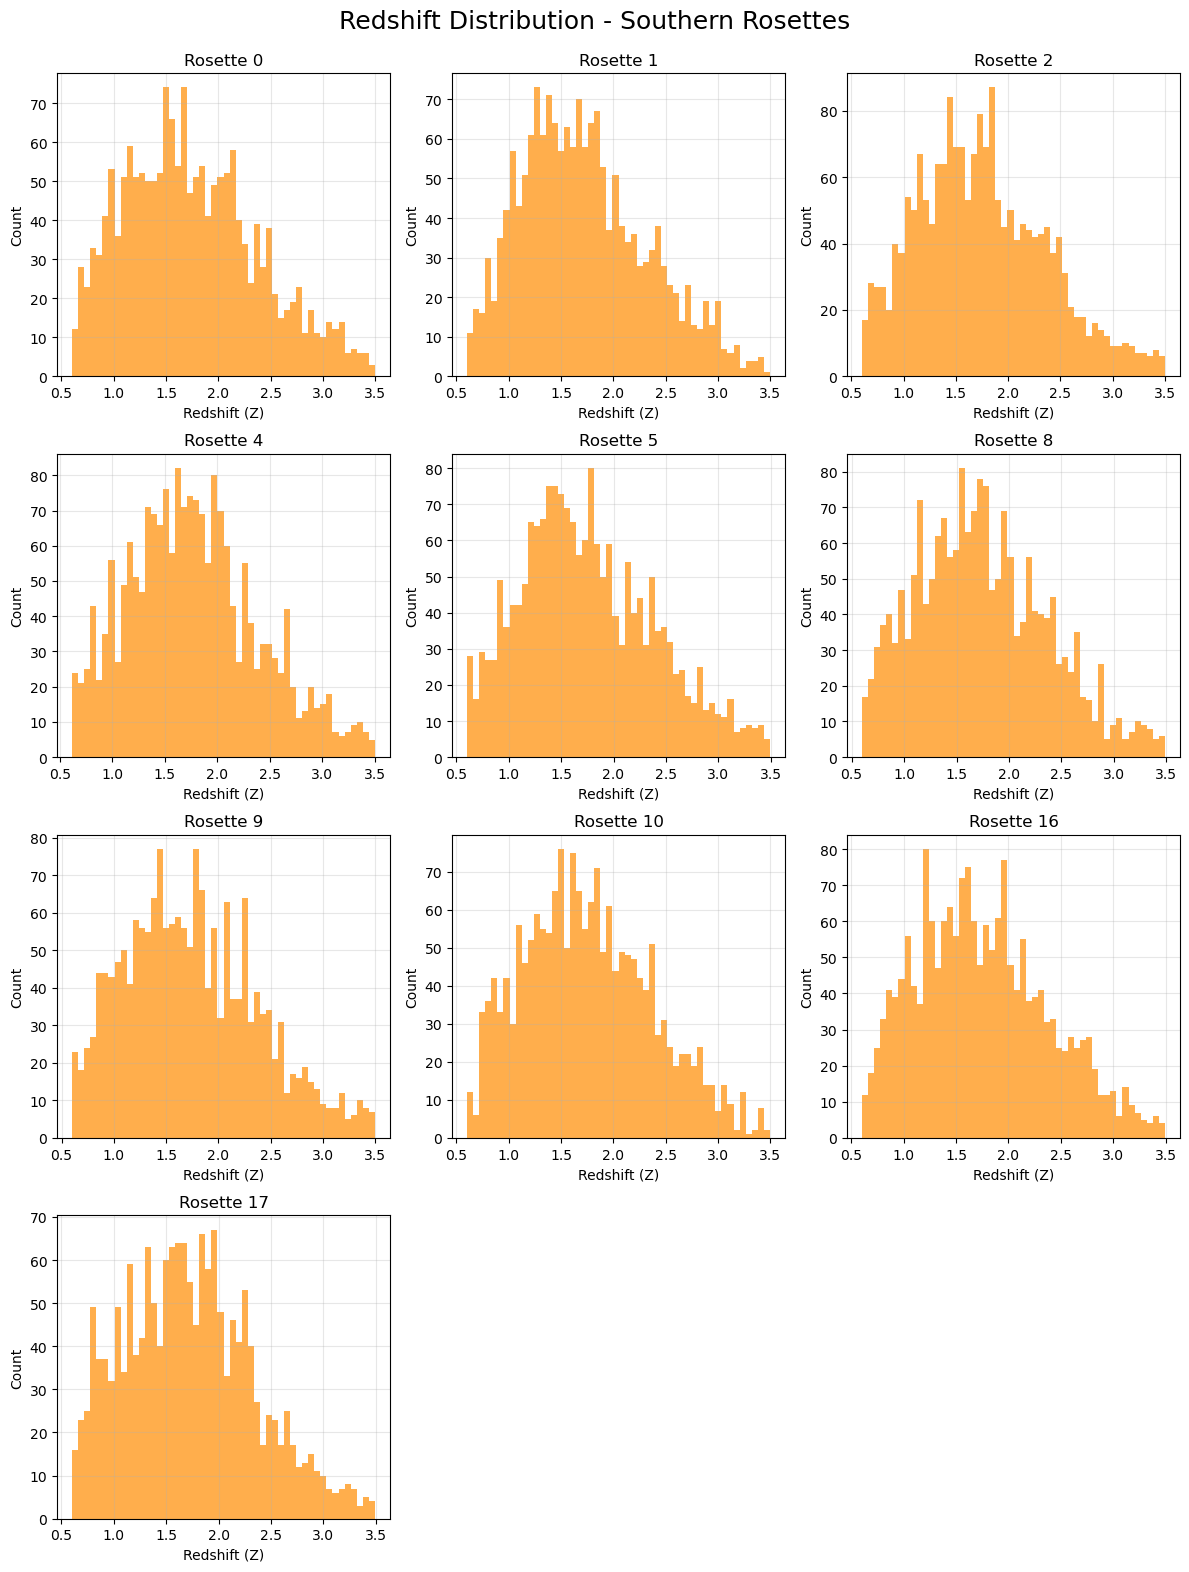

In [9]:
fig, axes = plt.subplots(4, 3, figsize=(12, 16))

for i, ros in enumerate(rosettes_S):
    ax = axes.flat[i]
    mask = lss_data_S['ROSETTE_NUMBER'] == ros
    ax.hist(lss_data_S['Z'][mask], bins=50, color='darkorange', alpha=0.7)
    ax.set_title(f'Rosette {ros}')
    ax.set_xlabel("Redshift (Z)")
    ax.set_ylabel("Count")
    ax.grid(True, alpha=0.3)

for j in range(i+1, len(axes.flat)):
    fig.delaxes(axes.flat[j])

fig.suptitle('Redshift Distribution - Southern Rosettes', fontsize=18)
plt.tight_layout()
plt.subplots_adjust(top=0.94)
plt.show()

# Filter by redshift

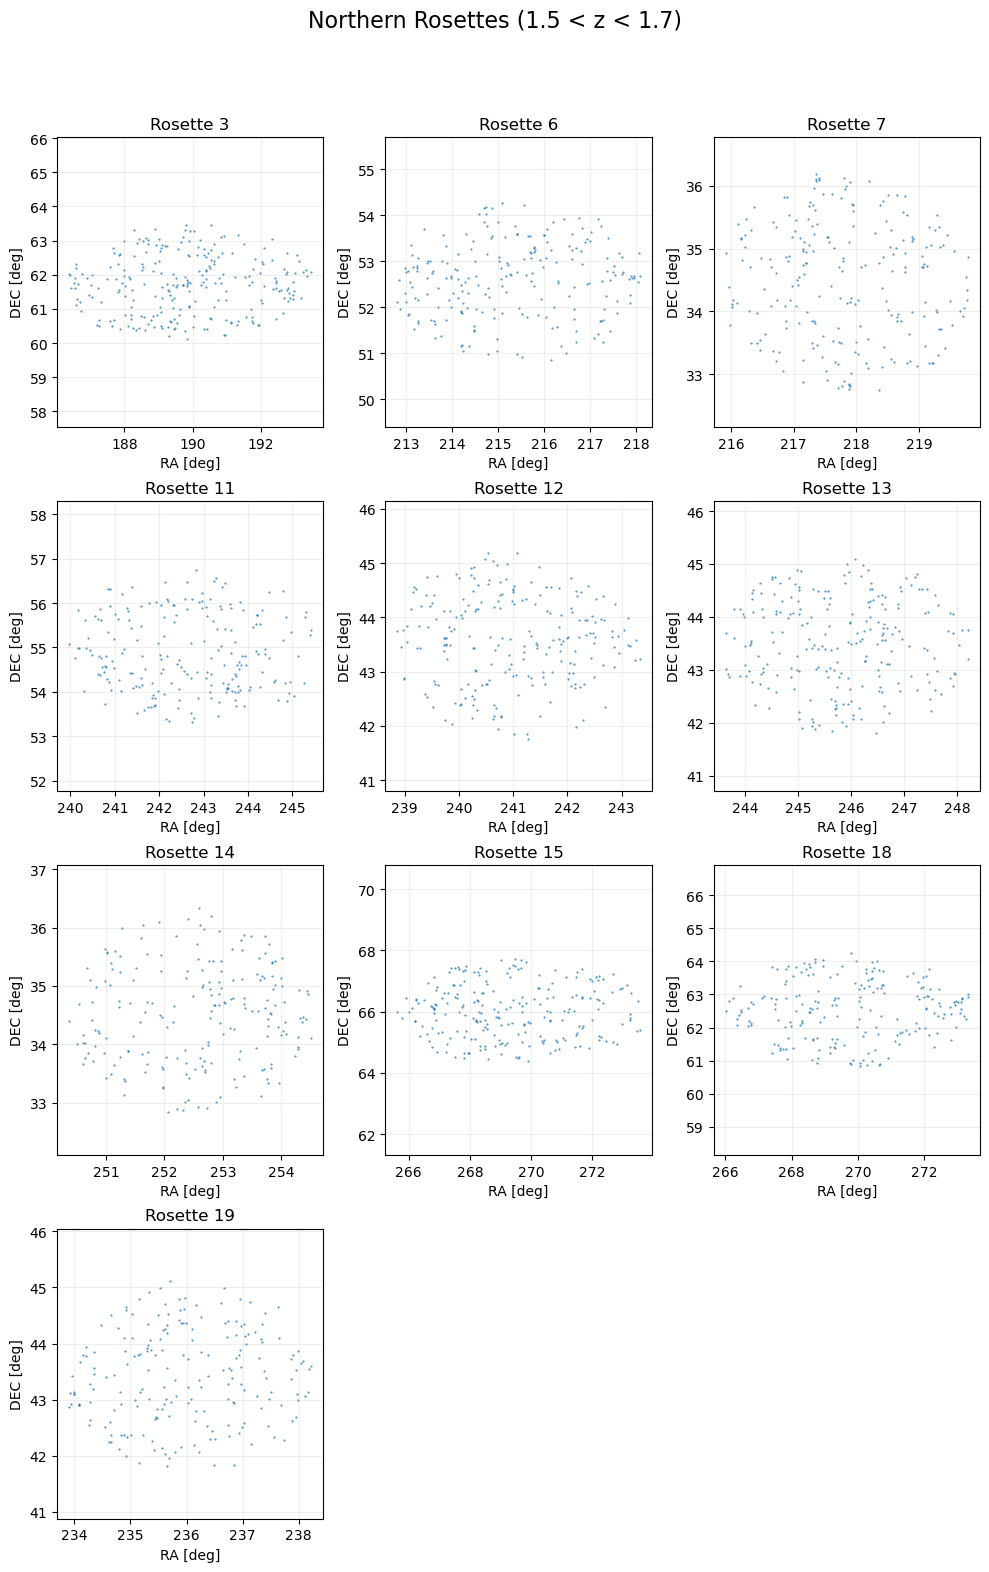

In [10]:
fig, axes = plt.subplots(4, 3, figsize=(10, 16))

for i, ros in enumerate(rosettes_N):
    ax = axes.flat[i]
    mask = (lss_data_N['ROSETTE_NUMBER'] == ros) & (lss_data_N['Z'] > 1.5) & (lss_data_N['Z'] < 1.7)
    ax.scatter(lss_data_N['RA'][mask], lss_data_N['DEC'][mask], s=0.2)
    ax.set_title(f'Rosette {ros}')
    ax.axis('equal')
    ax.grid(True, alpha=0.2)
    ax.set_xlabel("RA [deg]")
    ax.set_ylabel("DEC [deg]")

for j in range(i+1, len(axes.flat)):
    fig.delaxes(axes.flat[j])

fig.suptitle('Northern Rosettes (1.5 < z < 1.7)', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.show()

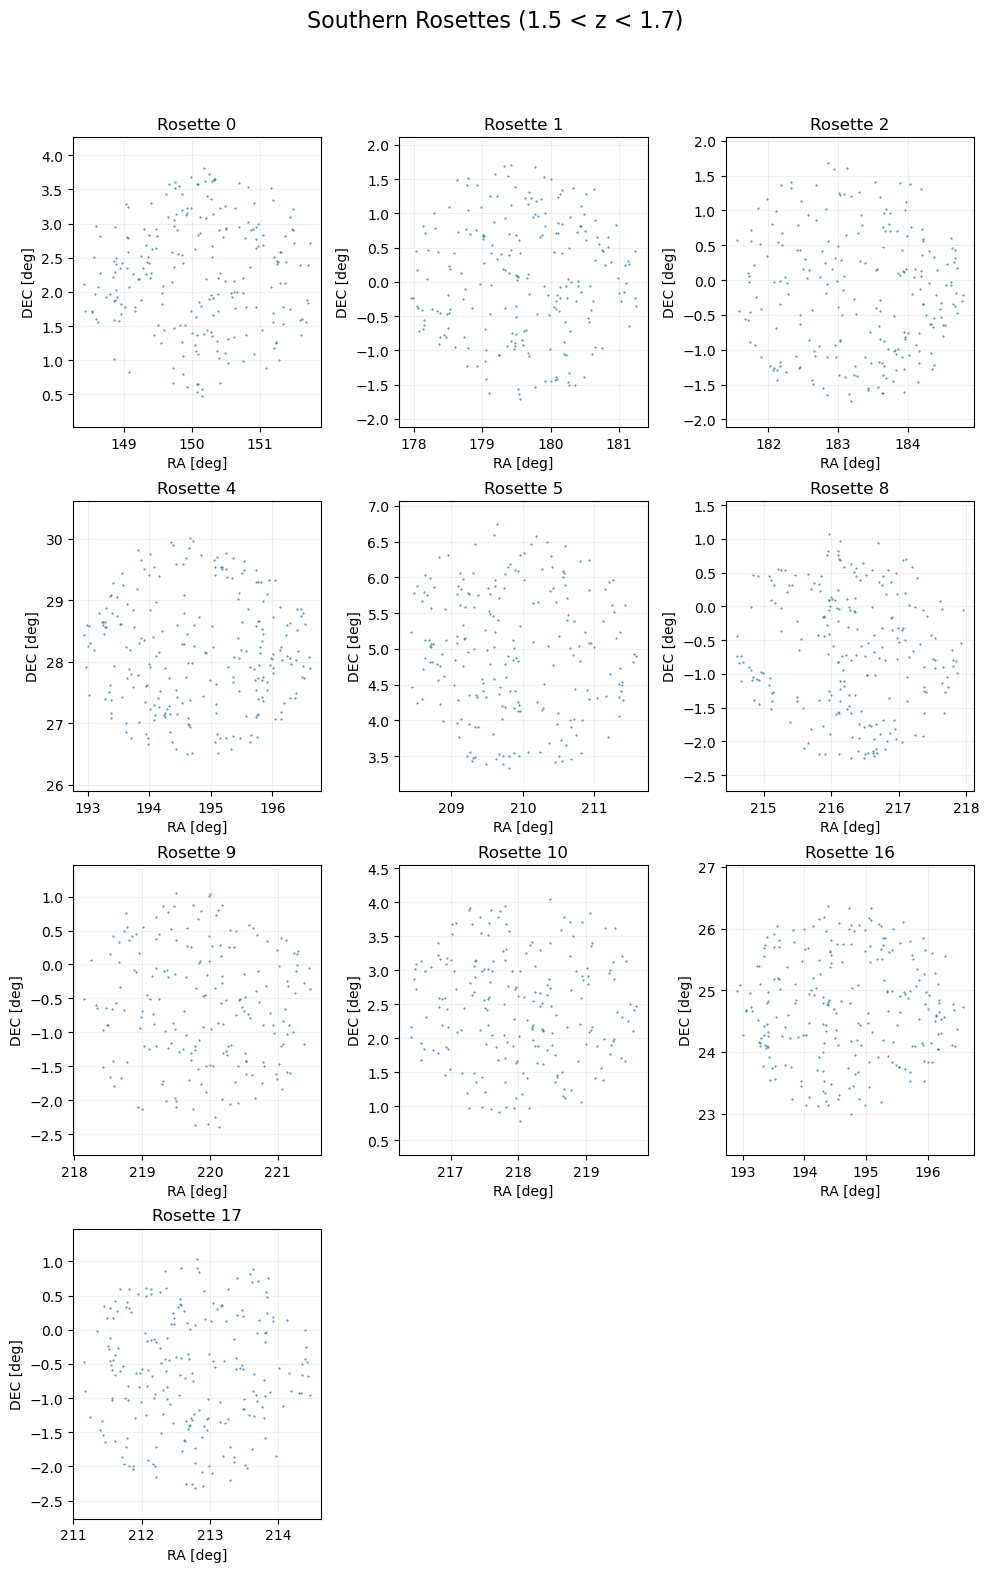

In [11]:
fig, axes = plt.subplots(4, 3, figsize=(10, 16))

for i, ros in enumerate(rosettes_S):
    ax = axes.flat[i]
    mask = (lss_data_S['ROSETTE_NUMBER'] == ros) & (lss_data_S['Z'] > 1.5) & (lss_data_S['Z'] < 1.7)
    ax.scatter(lss_data_S['RA'][mask], lss_data_S['DEC'][mask], s=0.2)
    ax.set_title(f'Rosette {ros}')
    ax.axis('equal')
    ax.grid(True, alpha=0.2)
    ax.set_xlabel("RA [deg]")
    ax.set_ylabel("DEC [deg]")

for j in range(i+1, len(axes.flat)):
    fig.delaxes(axes.flat[j])

fig.suptitle('Southern Rosettes (1.5 < z < 1.7)', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.show()